In [1]:
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisers import EqualFrequencyDiscretiser

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

## Equal-frequency discretization with pandas

The interval limits are the quantile limits. We can find those out with pandas qcut.

In [4]:
# let's use pandas qcut (quantile cut) and I indicate that
# we want 10 bins.

# retbins = True indicates that I want to capture the limits
# of the intervals (so I can then use them to cut the test set)

X_train['lstat_disc'], intervals = pd.qcut(
    X_train['LSTAT'], 10, labels=None, retbins=True, precision=3, duplicates='raise')

In [5]:
# let's visualize the interval edges

intervals

array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
       18.06 , 22.453, 36.98 ])

In [6]:
# let's have a look at the result: compare original
# and discretized variable

print(X_train[['LSTAT', 'lstat_disc']].head(10))

     LSTAT       lstat_disc
141  34.41  (22.453, 36.98]
272   7.73     (7.528, 9.5]
135  16.96  (15.565, 18.06]
298   4.97   (4.623, 6.202]
122  17.93  (15.565, 18.06]
22   18.72  (18.06, 22.453]
68   13.09   (11.16, 13.26]
20   21.02  (18.06, 22.453]
437  26.45  (22.453, 36.98]
14   10.26     (9.5, 11.16]


In [7]:
# let's check the percentage of observations per interval
# they should be roughly the same

X_train['lstat_disc'].value_counts() / len(X_train)

(7.528, 9.5]       0.104520
(22.453, 36.98]    0.101695
(15.565, 18.06]    0.101695
(13.26, 15.565]    0.101695
(1.729, 4.623]     0.101695
(11.16, 13.26]     0.098870
(6.202, 7.528]     0.098870
(4.623, 6.202]     0.098870
(18.06, 22.453]    0.096045
(9.5, 11.16]       0.096045
Name: lstat_disc, dtype: float64

In [8]:
# and now let's discretise LSTAT in the test set
# note how we now use pandas cut() instead of qcut() and
# pass the intervals we determined for the train set

X_test['lstat_disc'] = pd.cut(x = X_test['LSTAT'], bins=intervals)

In [9]:
# let's check the percentage of observations per interval
# should be roughly the same

X_test['lstat_disc'].value_counts() / len(X_test)

(7.528, 9.5]       0.131579
(22.453, 36.98]    0.118421
(13.26, 15.565]    0.118421
(11.16, 13.26]     0.111842
(15.565, 18.06]    0.098684
(4.623, 6.202]     0.098684
(9.5, 11.16]       0.092105
(1.73, 4.623]      0.085526
(18.06, 22.453]    0.078947
(6.202, 7.528]     0.059211
Name: lstat_disc, dtype: float64

In [10]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,lstat_disc
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41,"(22.453, 36.98]"
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73,"(7.528, 9.5]"
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,"(15.565, 18.06]"
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97,"(4.623, 6.202]"
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93,"(15.565, 18.06]"


Text(0, 0.5, 'Number of observations per bin')

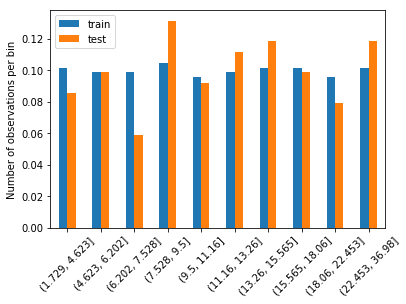

In [11]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

# determine proportion of observations per interval
t1 = X_train['lstat_disc'].value_counts() / len(X_train)
t2 = X_test['lstat_disc'].value_counts() / len(X_test)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

## Equal-frequency discretization with Feature-engine

In [12]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [13]:
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(q=10, variables = ['LSTAT', 'DIS', 'RM'])

disc.fit(X_train)

EqualFrequencyDiscretiser(q=10, return_object=False,
                          variables=['LSTAT', 'DIS', 'RM'])

In [14]:
# in the binner dict, we can see the limits of the intervals
# for each variable

disc.binner_dict_

{'LSTAT': [-inf,
  4.623,
  6.202,
  7.5280000000000005,
  9.5,
  11.16,
  13.260000000000002,
  15.565000000000005,
  18.06,
  22.452999999999996,
  inf],
 'DIS': [-inf,
  1.66132,
  1.9793,
  2.26121,
  2.6477400000000006,
  3.2157,
  3.7965,
  4.45352,
  5.40702,
  6.8147,
  inf],
 'RM': [-inf,
  5.5783000000000005,
  5.8532,
  5.9628000000000005,
  6.1048,
  6.2155000000000005,
  6.3946,
  6.5632,
  6.794,
  7.185,
  inf]}

In [15]:
# transform train and test sets

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

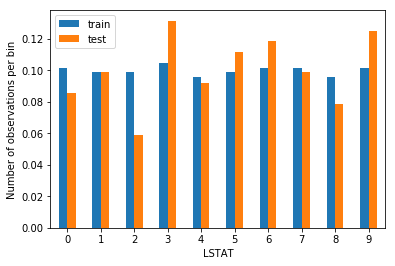

In [16]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

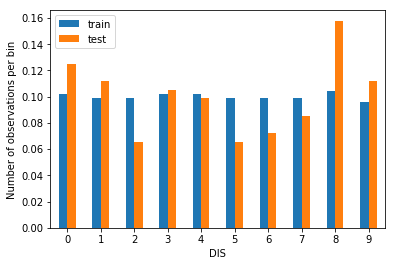

In [17]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

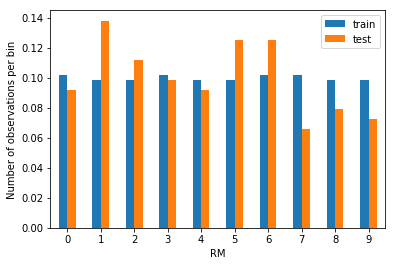

In [18]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## Equal-frequency discretization with Scikit-Learn

In [19]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [20]:
# let's set up a discretizer based on quantiles to sort values in 10 bins

disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

# fit the discretizer so that it learns the interval edges
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='quantile')

In [21]:
# the interval edges are stored in a transformer attribute:

disc.bin_edges_

array([array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
       18.06 , 22.453, 36.98 ]),
       array([ 1.1742 ,  1.66132,  1.9793 ,  2.26121,  2.64774,  3.2157 ,
        3.7965 ,  4.45352,  5.40702,  6.8147 , 12.1265 ]),
       array([3.561 , 5.5783, 5.8532, 5.9628, 6.1048, 6.2155, 6.3946, 6.5632,
       6.794 , 7.185 , 8.78  ])], dtype=object)

In [22]:
# let's transform the train set, remember it returns a NumPy array
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# let's transform the array to a dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

train_t.head()

,LSTAT,DIS,RM
0,9.0,0.0,0.0
1,3.0,6.0,6.0
2,7.0,2.0,5.0
3,1.0,9.0,5.0
4,7.0,2.0,2.0


In [23]:
# let's do the same for the test set

test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

Text(0, 0.5, 'Number of observations per bin')

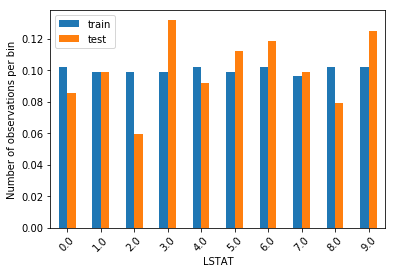

In [24]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

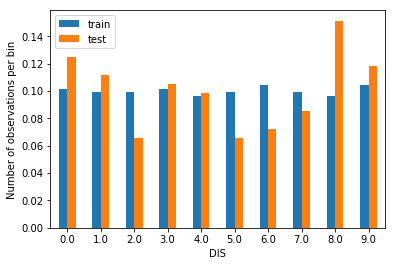

In [25]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

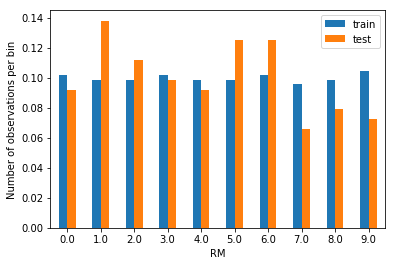

In [26]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')